# X-Ray Covid - ML Classification

This Jupyter Notebook contains the code and analysis for my project on classifying chest X-ray images of covid, viral pneumonia and normal using a convolutional neural network. 

The dataset used is [Kaggle COVID-19 Radiography database](https://www.kaggle.com/datasets/tawsifurrahman/covid19-radiography-database?resource=download)

The notebook is organized into the following sections:

- Data Preparation
- Model Architecture
- Model Training
- Model Evaluation
- Conclusion

## Data Preparation

The first step in any machine learning project is to prepare the data. In this section, we will read in the images from the directory that has the data, convert them to grayscale if they are not already in grayscale, and store them in a numpy array called `data`. The corresponding labels for each image are stored in a numpy array called `labels`. 

We use the `os` module to navigate the file system and the `PIL` library to read in the images. We also use the `numpy` library to store the images and labels as arrays.

In [56]:
import os
from PIL import Image
import numpy as np

data_dir = '/Users/macfadem/Documents/COVID-19_Radiography_Dataset'

data = []
labels = []

for subdir in os.listdir(data_dir):
    subdir_path = os.path.join(data_dir, subdir)
    
    if os.path.isdir(subdir_path):
        images_dir = os.path.join(subdir_path, 'images')
        
        for filename in os.listdir(images_dir):
            file_path = os.path.join(images_dir, filename)
            
            if file_path.endswith('.png') or file_path.endswith('.jpg'):
                img = Image.open(file_path)
                
                if img.mode != 'L':
                    img = img.convert('L')
                
                img_array = np.array(img)
                data.append(img_array)
                labels.append(subdir)

data = np.array(data)
labels = np.array(labels)

We use the `LabelEncoder` class from scikit-learn to encode the labels as integers. This is necessary because machine learning algorithms require numerical inputs. We then normalize the pixel values in `data` to be between 0 and 1 using the following code:

In [57]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(labels)
labels = encoder.transform(labels)

data = data / 255.0

This ensures that all of our features are on a similar scale and makes it easier for our machine learning algorithm to learn from the data.

Then, we use `train_test_split` to prepare 80% of the data for training, and the remaining 20% for testing.

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)

## Model Architeture

The model architecture consists of three convolutional layers with 32, 64 and 64 filters respectively, each followed by a max pooling layer. The output of the last pooling layer is flattened and passed through two dense layers with 64 and 3 units respectively. The final layer has 3 units because there are three classes to classify.

![A diagram of a convolutional neural network](https://editor.analyticsvidhya.com/uploads/90650dnn2.jpeg)
This is a similar process with different layers.

The choice of this architecture was based on previous research that has shown that CNNs are effective for image classification tasks. The use of multiple convolutional layers with increasing numbers of filters allows the model to learn increasingly complex features in the images. The use of max pooling layers helps to reduce the dimensionality of the feature maps and prevent overfitting.

In [59]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(299, 299, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3))


Compiling the model:

In [60]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Model Training
The model was trained using the Adam optimizer and Sparse Categorical Crossentropy loss function. The accuracy metric was used to evaluate the performance of the model. The choice of these parameters was based on previous research that has shown that they are effective for image classification tasks.

The model was trained for 5 epochs, i previously trained with 10 epochs but there were no improvements after the 5th epoch and to provide overfitting. Remembering the training set consisted of 80% of the data and the validation set consisted of 20% of the data.

In [62]:
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_test, y_test))

Epoch 1/5
379/379 [==============================] - 724s 2s/step - loss: 0.0284 - accuracy: 0.9902 - val_loss: 0.2225 - val_accuracy: 0.9489
Epoch 2/5
379/379 [==============================] - 544s 1s/step - loss: 0.0256 - accuracy: 0.9919 - val_loss: 0.2819 - val_accuracy: 0.9466
Epoch 3/5
379/379 [==============================] - 450s 1s/step - loss: 0.0112 - accuracy: 0.9965 - val_loss: 0.3178 - val_accuracy: 0.9452
Epoch 4/5
379/379 [==============================] - 464s 1s/step - loss: 0.0260 - accuracy: 0.9911 - val_loss: 0.3231 - val_accuracy: 0.9386
Epoch 5/5
379/379 [==============================] - 475s 1s/step - loss: 0.0237 - accuracy: 0.9929 - val_loss: 0.2736 - val_accuracy: 0.9442


## Model Evaluation

Now we can see that the model had a accuracy near 95%! Below it we can see also the training and validation accuracy over each epoch.

95/95 [==============================] - 23s 244ms/step - loss: 0.2736 - accuracy: 0.9442
Test accuracy: 0.9442428350448608


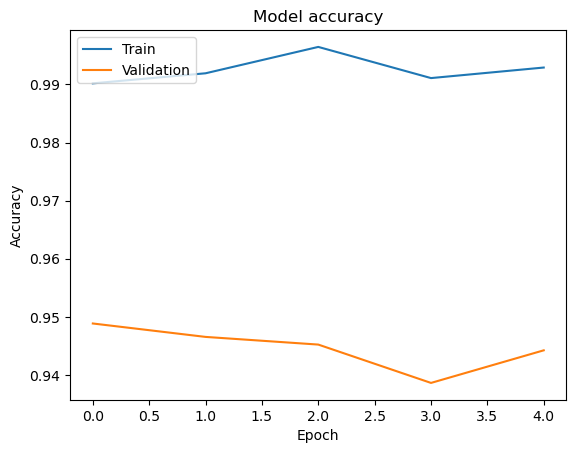

In [63]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Conclusion

Now we have our model ready! And to test it we can put a random image of the data and see the predicted classification vs the actual classification! Hope you liked it and any questions or feedback you can find me on my [GitHub](https://github.com/macfadem)

1/1 [==============================] - 0s 86ms/step


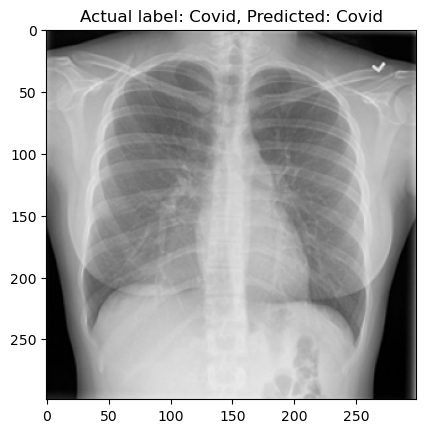

In [64]:
category_names = ['Normal', 'Covid', 'Viral Pneumonia']

img_index = np.random.randint(len(data))
img = data[img_index]
actual_label_index = labels[img_index]
actual_label_name = category_names[actual_label_index]

img = img.reshape((1,) + img.shape + (1,))

prediction = model.predict(img)
predicted_label_index = np.argmax(prediction)
predicted_label_name = category_names[predicted_label_index]

plt.imshow(img.squeeze(), cmap='gray')
plt.title(f'Actual label: {actual_label_name}, Predicted: {predicted_label_name}')
plt.show()